# Projeto Final

## Importação de bibliotecas e leitura de arquivo 

In [30]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objs as go
plt.style.use('seaborn-talk')
import warnings
warnings.filterwarnings('ignore')
import colorsys
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pycaret.classification import *
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.tree import DecisionTreeClassifier

In [31]:
df = pd.read_csv('heart.csv') #carregando o dataset

## Limpeza de dados

In [32]:
df = df.rename(columns={'age':'idade', 'sex':'sexo', 'cp':'tipo', 'trtbps':'pa repouso', 'chol':'colesterol', 'fbs':'glicemia', 'restecg':'ecg repouso', 'thalachh':'fc max',
       'exng':'exercicio', 'oldpeak':'oldpeak', 'slp':'slp', 'caa':'veias', 'thall':'talessemia', 'output':'output'}) #renomeando colunas

In [33]:
df = df.drop(['slp'],axis=1)

## Analise exploratoria

In [5]:
df.head() #visualiza o dataset

,idade,sexo,tipo,pa repouso,colesterol,glicemia,ecg repouso,fc max,exercicio,oldpeak,veias,talessemia,output
0,63,1,3,145,233,1,0,150,0,2.3,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,0,2,1


In [6]:
df.corr()['output'] #verificando correlação das colunas com o output

idade         -0.225439
sexo          -0.280937
tipo           0.433798
pa repouso    -0.144931
colesterol    -0.085239
glicemia      -0.028046
ecg repouso    0.137230
fc max         0.421741
exercicio     -0.436757
oldpeak       -0.430696
veias         -0.391724
talessemia    -0.344029
output         1.000000
Name: output, dtype: float64

In [7]:
df.info() #Verificando os tipos de dados e se possue valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   idade        303 non-null    int64  
 1   sexo         303 non-null    int64  
 2   tipo         303 non-null    int64  
 3   pa repouso   303 non-null    int64  
 4   colesterol   303 non-null    int64  
 5   glicemia     303 non-null    int64  
 6   ecg repouso  303 non-null    int64  
 7   fc max       303 non-null    int64  
 8   exercicio    303 non-null    int64  
 9   oldpeak      303 non-null    float64
 10  veias        303 non-null    int64  
 11  talessemia   303 non-null    int64  
 12  output       303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


In [8]:
df.groupby(["talessemia"]).count()

,idade,sexo,tipo,pa repouso,colesterol,glicemia,ecg repouso,fc max,exercicio,oldpeak,veias,output
talessemia,,,,,,,,,,,,
0,2,2,2,2,2,2,2,2,2,2,2,2
1,18,18,18,18,18,18,18,18,18,18,18,18
2,166,166,166,166,166,166,166,166,166,166,166,166
3,117,117,117,117,117,117,117,117,117,117,117,117


In [9]:
df.describe()

,idade,sexo,tipo,pa repouso,colesterol,glicemia,ecg repouso,fc max,exercicio,oldpeak,veias,talessemia,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,4.000000,3.000000,1.000000


<AxesSubplot:>

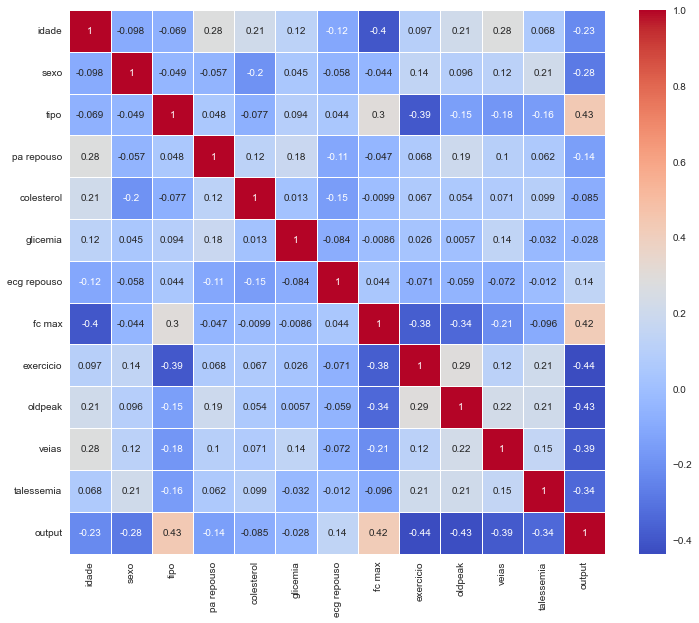

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",linewidths=.5) #grafico de correlação das colunas 

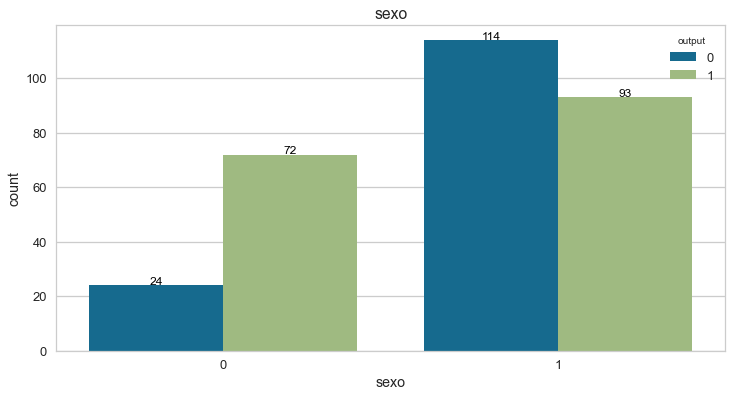

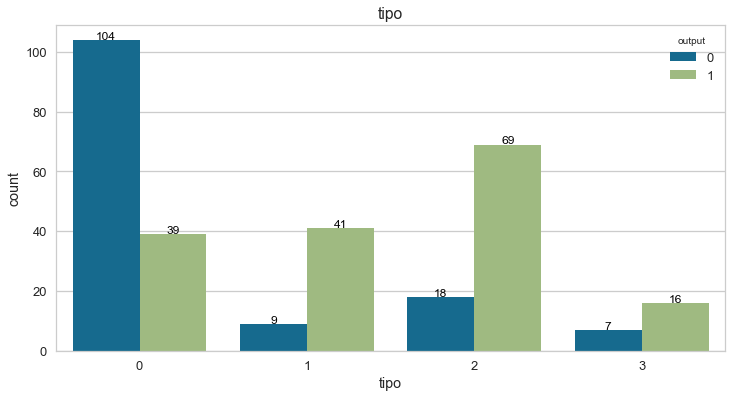

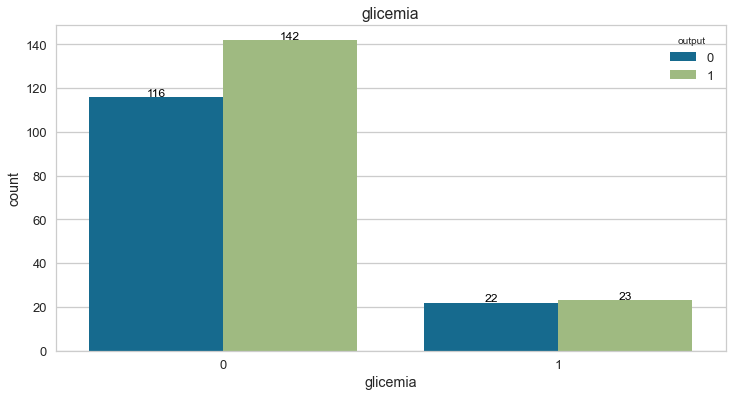

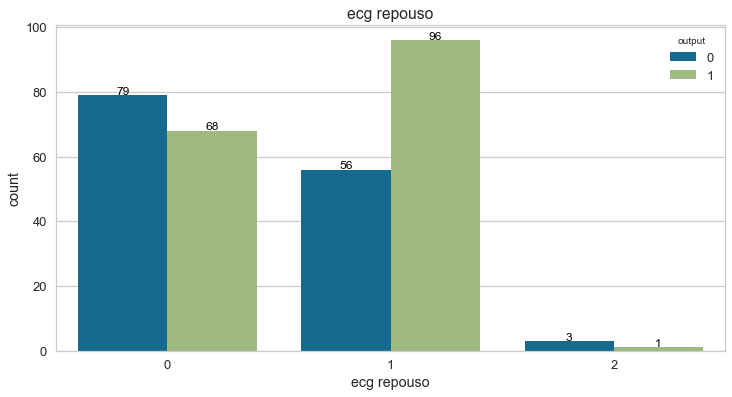

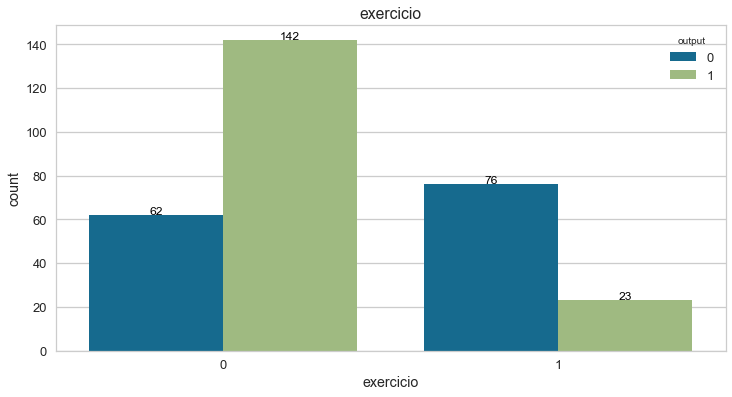

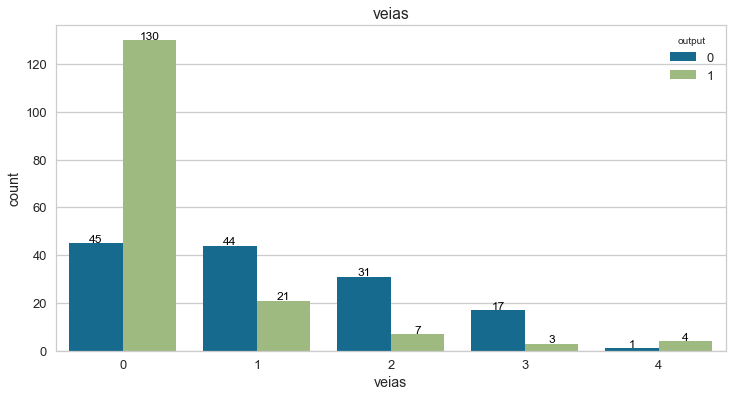

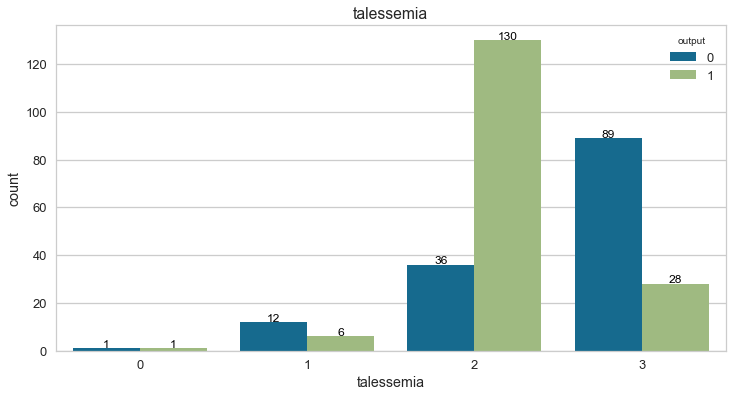

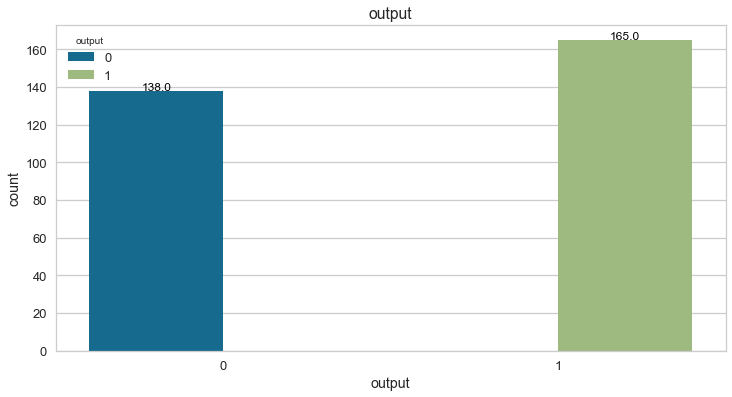

In [78]:
colunas = ['sexo', 'tipo', 'glicemia','ecg repouso', 'exercicio', 'veias', 'talessemia','output']
df2 = df.loc[:, colunas]

for i in colunas:
    plt.figure(figsize = (12, 6))
    plot = sns.countplot(x = i, data = df2, hue = "output")
    plt.title(i)


    for i in plot.patches:
        plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=12,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')
    plt.show()

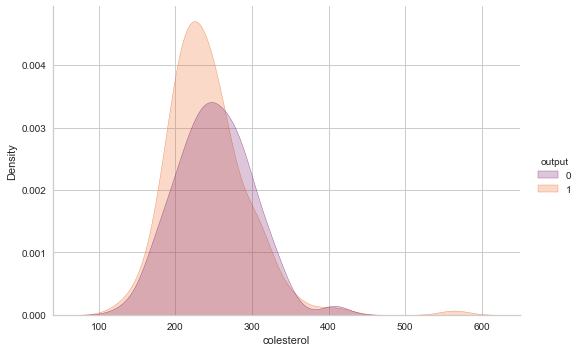

In [16]:
sns.displot(df, x='colesterol', hue='output', kind="kde",fill=True, palette='inferno', aspect=1.5)

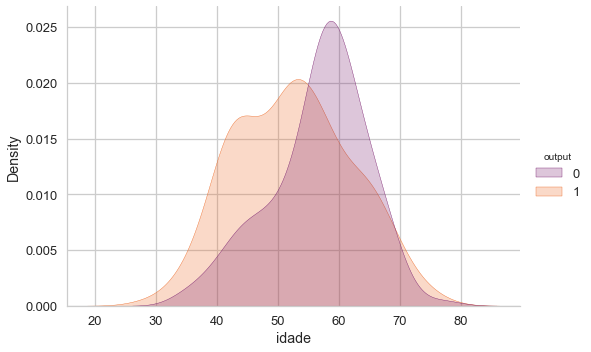

In [79]:
sns.displot(df, x='idade', hue='output', kind="kde",fill=True, palette='inferno', aspect=1.5)

## Modelagem

In [34]:
X = df.drop('output', axis=1)
y = df['output']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) 

In [37]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

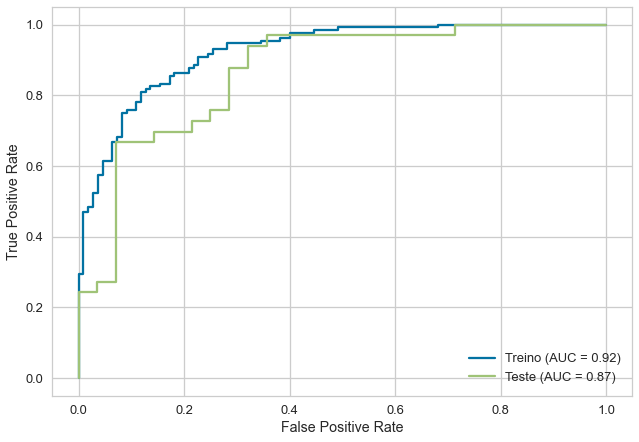

In [39]:
fig, ax = plt.subplots()
plot_roc_curve(model, X_train, y_train, ax=ax, name='Treino')
plot_roc_curve(model, X_test, y_test, ax=ax, name='Teste')

In [53]:
adaboost = AdaBoostClassifier(
            base_estimator=DecisionTreeClassifier(max_depth=2),
            n_estimators=100,
            learning_rate=.03)

In [54]:
adaboost.fit(X_train,y_train)
print(roc_auc_score(y_train, adaboost.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, adaboost.predict_proba(X_test)[:, 1]))

0.9700068870523416
0.9004329004329004


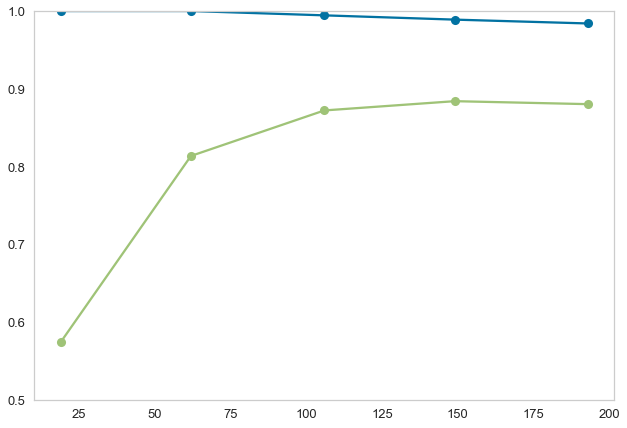

In [55]:
curves = learning_curve(adaboost, X_train, y_train, scoring='roc_auc')
train_sizes = curves[0]
train_scores = curves[1]
test_scores = curves[2]

plt.plot(train_sizes, train_scores.mean(axis=1),'-o')
plt.plot(train_sizes, test_scores.mean(axis=1),'-o');
plt.ylim([0.5, 1])
plt.grid()

In [16]:
data_train,data_test = train_test_split(df, test_size = 0.2)

In [17]:
classification = setup(data = data_train, target = 'output', session_id=42) 

,Description,Value
0,session_id,42
1,Target,output
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(242, 13)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [63]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9412,0.9583,1.0000,0.9000,0.9474,0.8811,0.8874
1,0.9412,1.0000,1.0000,0.9000,0.9474,0.8811,0.8874
2,0.8235,0.9028,1.0000,0.7500,0.8571,0.6383,0.6847
3,0.8235,0.9861,1.0000,0.7500,0.8571,0.6383,0.6847
4,0.6471,0.8056,0.5556,0.7143,0.6250,0.3014,0.3099
5,0.8824,0.9306,0.8889,0.8889,0.8889,0.7639,0.7639
6,0.8235,0.9444,1.0000,0.7500,0.8571,0.6383,0.6847
7,0.7647,0.8571,0.6000,1.0000,0.7500,0.5526,0.6179
8,0.7059,0.7571,0.8000,0.7273,0.7619,0.3796,0.3825


In [75]:
a = tune_model(ada, n_iter=1000,custom_grid ={'learning_rate':[0.05],'n_estimators':[50]})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8824,0.9444,0.8889,0.8889,0.8889,0.7639,0.7639
1,0.7647,0.8056,0.7778,0.7778,0.7778,0.5278,0.5278
2,0.7647,0.9167,0.8889,0.7273,0.8000,0.5211,0.5367
3,0.8235,0.9722,0.8889,0.8000,0.8421,0.6434,0.6480
4,0.7647,0.8403,0.7778,0.7778,0.7778,0.5278,0.5278
5,0.8824,0.9444,0.8889,0.8889,0.8889,0.7639,0.7639
6,0.8824,0.9167,1.0000,0.8182,0.9000,0.7606,0.7833
7,0.7647,0.9286,0.6000,1.0000,0.7500,0.5526,0.6179
8,0.8235,0.8500,0.9000,0.8182,0.8571,0.6277,0.6326


In [77]:
print(a)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=50, random_state=42)


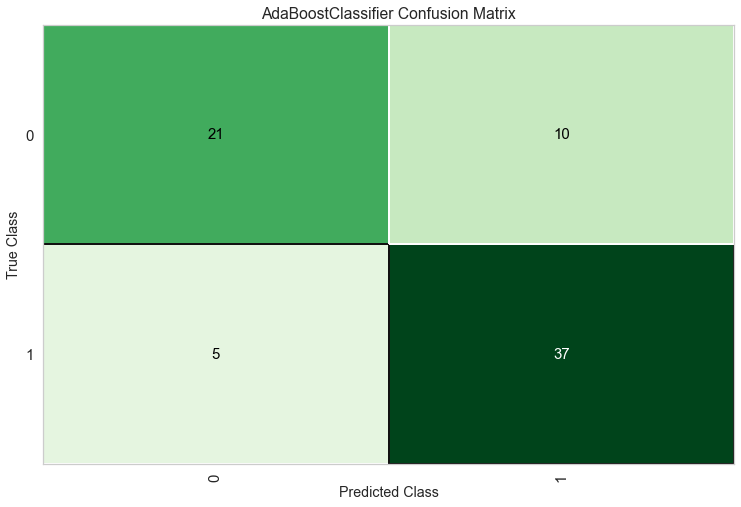

In [76]:
plot_model(a, plot = 'confusion_matrix')

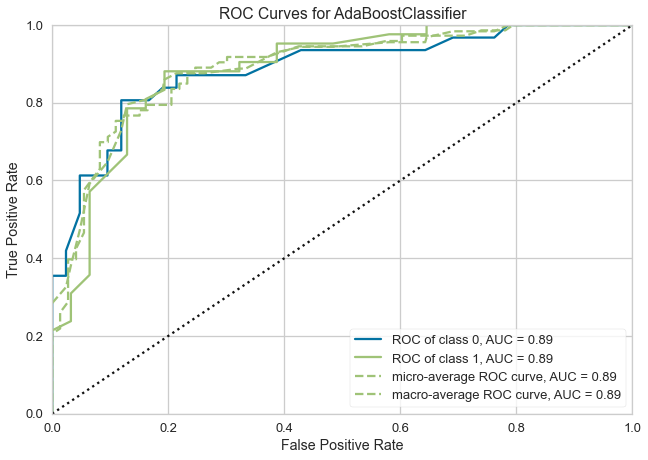

In [80]:
plot_model(a, plot = 'auc')

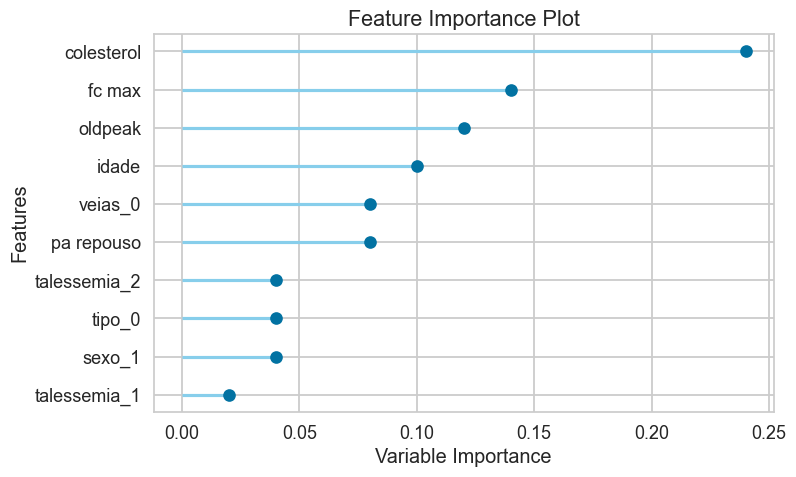

In [59]:
plot_model(ad, plot='feature')

In [66]:
final_lr = finalize_model(lr)

In [25]:
predict_model(final_lr, data=data_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8197,0.9097,0.8387,0.8125,0.8254,0.6391,0.6394


,idade,sexo,tipo,pa repouso,colesterol,glicemia,ecg repouso,fc max,exercicio,oldpeak,veias,talessemia,output,Label,Score
120,64,0,0,130,303,0,1,122,0,2.0,2,2,1,0,0.8854
287,57,1,1,154,232,0,0,164,0,0.0,1,2,0,1,0.6438
49,53,0,0,138,234,0,0,160,0,0.0,0,2,1,1,0.9224
241,59,0,0,174,249,0,1,143,1,0.0,0,2,0,1,0.7127
278,58,0,1,136,319,1,0,152,0,0.0,2,2,0,1,0.8129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,43,1,0,150,247,0,1,171,0,1.5,0,2,1,1,0.6190
158,58,1,1,125,220,0,1,144,0,0.4,4,3,1,0,0.6472
168,63,1,0,130,254,0,0,147,0,1.4,1,3,0,0,0.9491
189,41,1,0,110,172,0,0,158,0,0.0,0,3,0,1,0.6149


In [71]:
tune_model(ada, n_iter=1000)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9412,0.9861,1.0000,0.9000,0.9474,0.8811,0.8874
1,0.8824,0.9028,1.0000,0.8182,0.9000,0.7606,0.7833
2,0.8235,0.9167,1.0000,0.7500,0.8571,0.6383,0.6847
3,0.9412,0.9861,0.8889,1.0000,0.9412,0.8828,0.8889
4,0.8824,0.8611,1.0000,0.8182,0.9000,0.7606,0.7833
5,0.8824,0.9583,0.8889,0.8889,0.8889,0.7639,0.7639
6,0.8824,0.9167,1.0000,0.8182,0.9000,0.7606,0.7833
7,0.7647,0.9286,0.6000,1.0000,0.7500,0.5526,0.6179
8,0.7647,0.8429,0.9000,0.7500,0.8182,0.4925,0.5092


AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.5,
                   n_estimators=50, random_state=42)